<a href="https://colab.research.google.com/github/edilmita/edilmita/blob/main/Loans_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
loans = pd.read_csv('Loans_Training')

In [ ]:
loans.head()

,Approval,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
0,F,0.0,397,1000,450.0
1,F,0.0,403,500,225.0
2,F,0.0,408,1000,450.0
3,F,0.0,408,2000,900.0
4,F,0.0,411,5000,2250.0


In [ ]:
# this function will convert our F and T to 0 and 1 respectively
def convert(x):
    if x == 'F':
        return 0
    if x == 'T':
        return 1

In [ ]:
# to override the column
loans['Approval'] = loans['Approval'].apply(convert)

In [ ]:
loans.head()

,Approval,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
0,0,0.0,397,1000,450.0
1,0,0.0,403,500,225.0
2,0,0.0,408,1000,450.0
3,0,0.0,408,2000,900.0
4,0,0.0,411,5000,2250.0


**Train and Test Split as Preparation to doing a C5 model**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# dropping the columns we do not need to predict Approval
X = loans.drop(['Approval','Interest'],axis=1)
y = loans['Approval']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

**Creating an instance of our model**

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
#fitting it to our data
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

**Let's test how our model is performing by using matrix and the classification report**

In [ ]:
#let's try to test our model by making it predict the approval
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

# our model is doing quiet well and can be improved to have more precision and recall

              precision    recall  f1-score   support

           0       0.77      0.80      0.78     22512
           1       0.79      0.76      0.77     22579

    accuracy                           0.78     45091
   macro avg       0.78      0.78      0.78     45091
weighted avg       0.78      0.78      0.78     45091



In [ ]:
print(confusion_matrix(y_test,predictions))

# we have correctly predicted 17933 True Positives and 17094 True Negatives
# True positives are where the model predicted that it is 1 when in fact it is really 1
# and same goes for True negatives but with 0

# 5485 are false negatives and 4579 are false positives

[[17933  4579]
 [ 5485 17094]]


**The picture below is a guide to the matrix**

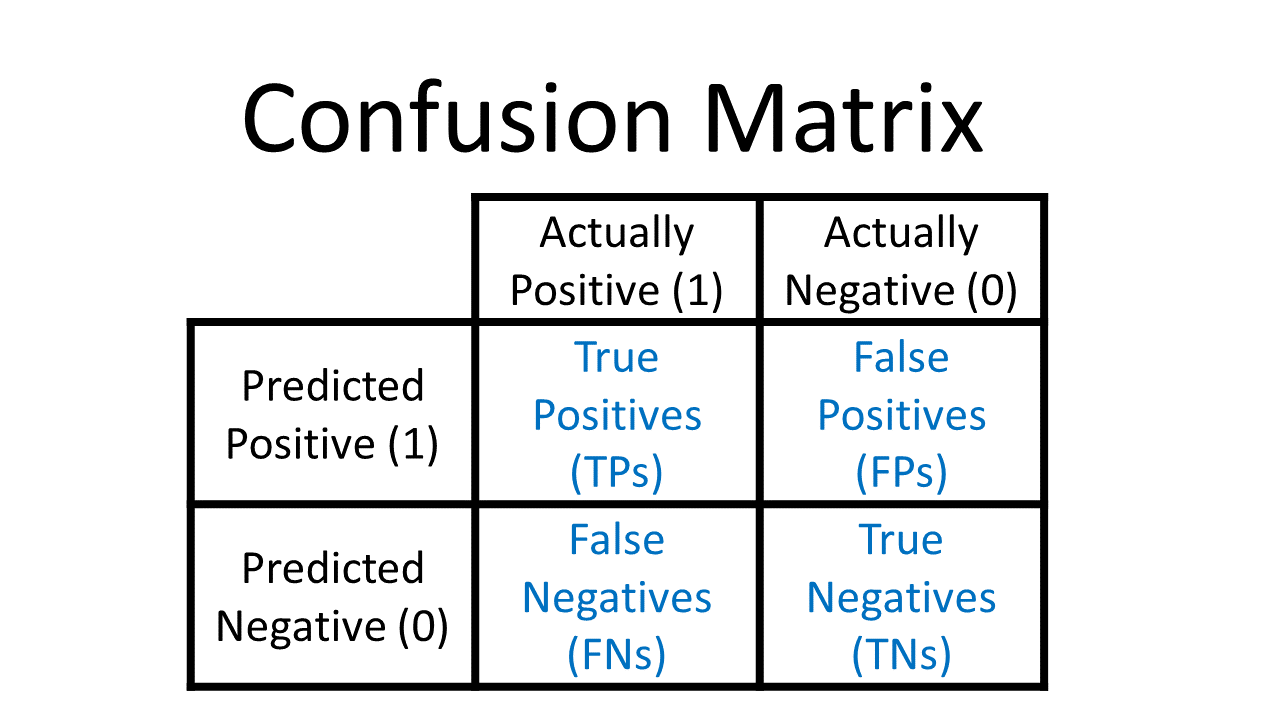

In [ ]:
# it's the same with the data-driven cost matrix
from IPython.display import Image
url = 'https://glassboxmedicine.files.wordpress.com/2019/02/confusion-matrix.png'
Image(url,width=500, height=500)